In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')

df = pd.read_csv(r'/Users/udbhaav/Desktop/Learning Data Analysis/Python Project 2/Sample - Superstore.csv', encoding='ISO-8859-1')


In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Row ID - 0.0%
Order ID - 0.0%
Order Date - 0.0%
Ship Date - 0.0%
Ship Mode - 0.0%
Customer ID - 0.0%
Customer Name - 0.0%
Segment - 0.0%
Country - 0.0%
City - 0.0%
State - 0.0%
Postal Code - 0.0%
Region - 0.0%
Product ID - 0.0%
Category - 0.0%
Sub-Category - 0.0%
Product Name - 0.0%
Sales - 0.0%
Quantity - 0.0%
Discount - 0.0%
Profit - 0.0%


In [10]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [12]:
# Remove duplicate entries
df = df.drop_duplicates()

In [14]:
# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [16]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


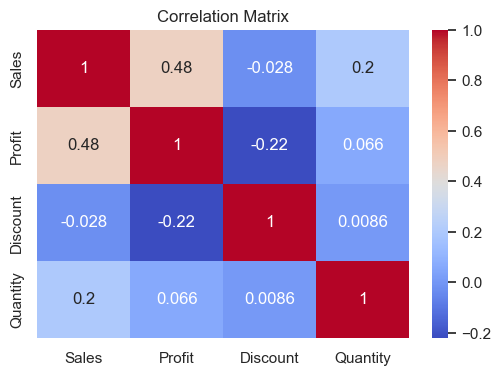

In [18]:
# Correlation between numeric columns
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

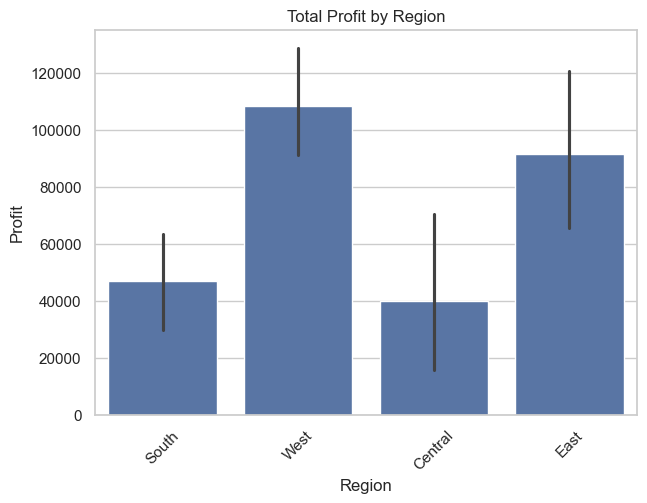

In [20]:
# Total profit by region
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='Region', y='Profit', estimator=sum)
plt.title('Total Profit by Region')
plt.xticks(rotation=45)
plt.show()

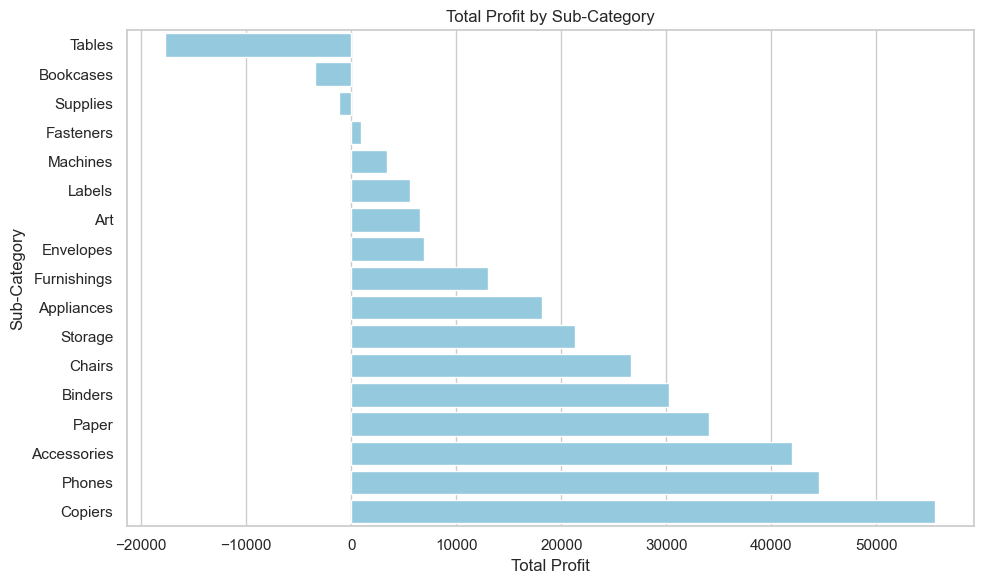

In [22]:
# Calculate total profit by sub-category
profit_by_subcat = df.groupby('Sub-Category')['Profit'].sum().sort_values()

# Plot horizontal bar chart without palette warning
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_subcat.values, y=profit_by_subcat.index, color='skyblue')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

In [24]:
# Convert 'Order Date' to quarterly period
df['Quarter'] = df['Order Date'].dt.to_period('Q')


In [26]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Quarter
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016Q4
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016Q4
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016Q2
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015Q4
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015Q4


In [34]:
# Group by quarter and sum sales
quarterly = df.groupby('Quarter')['Sales'].sum().reset_index()

In [36]:
# Format quarter labels with a space between year and quarter
quarterly['Quarter'] = quarterly['Quarter'].astype(str).str.replace('Q', ' Q')

In [40]:
# Plot quarterly sales trend with expanded y-axis
plt.figure(figsize=(12, 5))
sns.lineplot(data=quarterly, x='Quarter', y='Sales')
plt.title('Quarterly Sales Trend')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '2014 Q1'),
  Text(1, 0, '2014 Q2'),
  Text(2, 0, '2014 Q3'),
  Text(3, 0, '2014 Q4'),
  Text(4, 0, '2015 Q1'),
  Text(5, 0, '2015 Q2'),
  Text(6, 0, '2015 Q3'),
  Text(7, 0, '2015 Q4'),
  Text(8, 0, '2016 Q1'),
  Text(9, 0, '2016 Q2'),
  Text(10, 0, '2016 Q3'),
  Text(11, 0, '2016 Q4'),
  Text(12, 0, '2017 Q1'),
  Text(13, 0, '2017 Q2'),
  Text(14, 0, '2017 Q3'),
  Text(15, 0, '2017 Q4')])

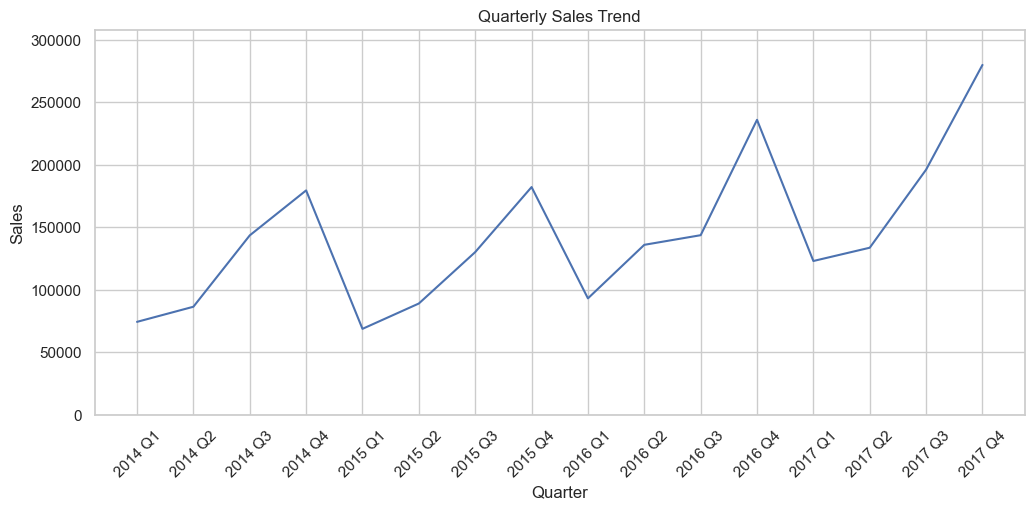

In [42]:
# Expand y-axis limits by 10% padding above max sales
max_sales = quarterly['Sales'].max()
plt.ylim(0, max_sales * 1.1)

plt.show()

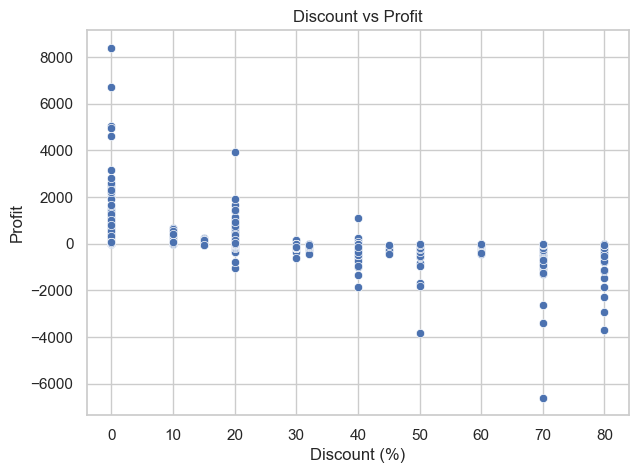

In [44]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['Discount'] * 100, y=df['Profit'])  # Multiply Discount by 100 for percentage
plt.title('Discount vs Profit')
plt.xlabel('Discount (%)')  # Update x-axis label to reflect percentage
plt.show()